# Chicago Public Schools Performance Reports 2011-2012

## Abstract

Reviewing a series of reported assessments, metrics and other scores to determine the attributes of a successful school. These features include measures of safety, intstruction and leadership, parental support, attendance and college enrollment.  The analysis uses Recursive Feature Elimination with Cross-Validationa to determine the meanigful features of a successful school.

## Introduction

School performance [reporting](https://www.cps.edu/about/district-data/metrics/accountability-reports/) has existed for some time, seeking to assess and quantify the effectiveness of public school systems.  Often, these assessments look solely at student achievement through results of standardized tests.  The source data set and this analysis are novel because of the features under review which extend beyond simply test scores and include a holistic, 360 degree view of the school's experience.

Chicago is among the nation's largest public school districts spanning a large population with differing economic conditions.  While the source dataset doesn't explicitly indicate economic terms, it does include score for safety and parent support which serve as a proxy for economic conditions.

The dataset captures a range of factors: attendance, instruction, parental support, safety and geography. This analysis is a review these different factors and identify which features are representative of a high achieving school.

## Research Questions

- Identify the traits that factor into a superlative school
- Determine if geographic factors have any impact on school performance
- Create a model that scores 85% or better

## Exploratory Data Analysis

Load dataset from local CSV and gather some basic information regarding shape and other info.

Review understanding of the break down of 

In [1]:
import pandas as pd

data = pd.read_csv('./data/Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012_.csv')

data.head(5)

,School ID,Name of School,"Elementary, Middle, or High School",Street Address,City,State,ZIP Code,Phone Number,Link,Network Manager,...,RCDTS Code,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,Community Area Number,Community Area Name,Ward,Police District,Location
0,609966,Charles G Hammond Elementary School,ES,2819 W 21st Pl,Chicago,IL,60623,(773) 535-4580,http://schoolreports.cps.edu/SchoolProgressRep...,Pilsen-Little Village Elementary Network,...,150000000000000,1157809.015,1889554.623,41.852691,-87.696278,30,SOUTH LAWNDALE,12,10,"(41.85269133, -87.69627777)"
1,610539,Marvin Camras Elementary School,ES,3000 N Mango Ave,Chicago,IL,60634,(773) 534-2960,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,150000000000000,1137482.296,1919394.900,41.934966,-87.770165,19,BELMONT CRAGIN,30,25,"(41.93496641, -87.77016525)"
2,609852,Eliza Chappell Elementary School,ES,2135 W Foster Ave,Chicago,IL,60625,(773) 534-2390,http://schoolreports.cps.edu/SchoolProgressRep...,Ravenswood-Ridge Elementary Network,...,150000000000000,1161016.902,1934466.545,41.975867,-87.683254,4,LINCOLN SQUARE,47,20,"(41.975867, -87.68325438)"
3,609835,Daniel R Cameron Elementary School,ES,1234 N Monticello Ave,Chicago,IL,60651,(773) 534-4290,http://schoolreports.cps.edu/SchoolProgressRep...,Garfield-Humboldt Elementary Network,...,150000000000000,1151767.546,1908130.068,41.903785,-87.717963,23,HUMBOLDT PARK,26,25,"(41.90378521, -87.71796315)"
4,610521,Sir Miles Davis Magnet Elementary Academy,ES,6730 S Paulina St,Chicago,IL,60636,(773) 535-9120,http://schoolreports.cps.edu/SchoolProgressRep...,Englewood-Gresham Elementary Network,...,150000000000000,1166133.893,1859929.018,41.771222,-87.666567,67,WEST ENGLEWOOD,15,7,"(41.77122181, -87.66656657)"


In [2]:
# display shape of data - rows and columns
data.shape

(566, 79)

In [3]:
# display dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 79 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   School ID                                          566 non-null    int64  
 1   Name of School                                     566 non-null    object 
 2   Elementary, Middle, or High School                 566 non-null    object 
 3   Street Address                                     566 non-null    object 
 4   City                                               566 non-null    object 
 5   State                                              566 non-null    object 
 6   ZIP Code                                           566 non-null    int64  
 7   Phone Number                                       566 non-null    object 
 8   Link                                               565 non-null    object 
 9   Network Ma

No     476
Yes     72
NDA     18
Name: Adequate Yearly Progress Made? , dtype: int64


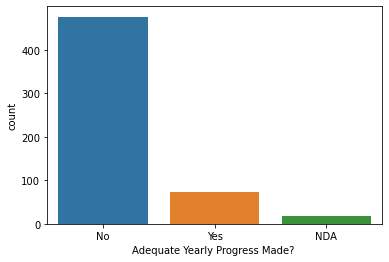

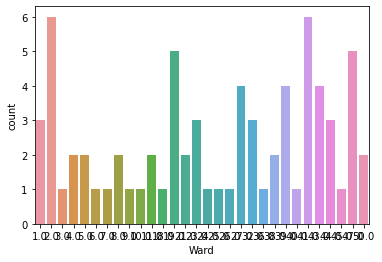

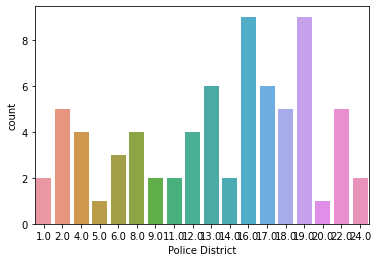

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# print passing vs failing counts
print(data['Adequate Yearly Progress Made? '].value_counts())

# vizualize yearly progress grades
sns.countplot(x='Adequate Yearly Progress Made? ', data=data)
plt.show()

sns.countplot(x='Ward', data=data.where(data['Adequate Yearly Progress Made? '] == 'Yes'))
plt.show()

sns.countplot(x='Police District', data=data.where(data['Adequate Yearly Progress Made? '] == 'Yes'))
plt.show()

## Data Cleaning

- Remove Adequate Yearly Progress Made records with NDA and cast to binary value
- Fill NA score values with zero
- Replace NDA values with zero
- Cast score values to integers


In [5]:
# remove records identified with not enough data 
data = data[data['Adequate Yearly Progress Made? '] != 'NDA']

# cast to binary value
data['AdequateYearlyProgressMade'] = data.apply(lambda x: 0 if x['Adequate Yearly Progress Made? '] == 'No' else 1, axis = 1)

In [6]:
# fill na on scores
data['Safety Score'].fillna(data['Safety Score'].median(), inplace=True)
data['Family Involvement Score'].fillna(0, inplace=True)
data['Environment Score'].fillna(data['Environment Score'].median(), inplace=True)
data['Instruction Score'].fillna(data['Instruction Score'].median(), inplace=True)
data['Leaders Score '].fillna(0, inplace=True)
data['Teachers Score'].fillna(0, inplace=True)

In [7]:
data['Family Involvement Score'] != 'NDA')

0      False
1       True
2       True
3      False
4      False
       ...  
561     True
562    False
563     True
564    False
565    False
Name: Family Involvement Score, Length: 548, dtype: bool

In [8]:
# baseline scores and replace NDA with 0
data['FamilyInvolvementScore'] = data.apply(lambda x: (0 if x['Family Involvement Score'] == 'NDA' else x['Family Involvement Score']), axis = 1)
data['LeadersScore'] = data.apply(lambda x: (0 if x['Leaders Score '] == 'NDA' else x['Leaders Score ']), axis = 1)
data['TeachersScore'] = data.apply(lambda x: (0 if x['Teachers Score'] == 'NDA' else x['Teachers Score']), axis = 1)
data['ParentEngagementScore'] = data.apply(lambda x: (0 if x['Parent Engagement Score'] == 'NDA' else x['Parent Engagement Score']), axis = 1)
data['ParentEnvironmentScore'] = data.apply(lambda x: (0 if x['Parent Environment Score'] == 'NDA' else x['Parent Environment Score']), axis = 1)

In [9]:
data['Safety Score'] = data['Safety Score'].astype('int')
data['FamilyInvolvementScore'] = data['FamilyInvolvementScore'].astype('int')
data['Environment Score'] = data['Environment Score'].astype('int')
data['Instruction Score'] = data['Instruction Score'].astype('int')
data['LeadersScore'] = data['LeadersScore'].astype('int')
data['TeachersScore'] = data['TeachersScore'].astype('int')
data['ParentEngagementScore'] = data['ParentEngagementScore'].astype('int')
data['ParentEnvironmentScore'] = data['ParentEnvironmentScore'].astype('int')

In [10]:
# display basic metrics for features under review
print('Safety Score: max {:f} mean {:f} min {:f}'.format(data['Safety Score'].max(), data['Safety Score'].mean(), data['Safety Score'].min()))
print('College Enrollment (number of students): max {:f} mean {:f} min {:f}'.format(data['College Enrollment (number of students) '].max(), data['College Enrollment (number of students) '].mean(), data['College Enrollment (number of students) '].min()))

Safety Score: max 99.000000 mean 49.074818 min 1.000000
College Enrollment (number of students): max 4368.000000 mean 639.244526 min 44.000000


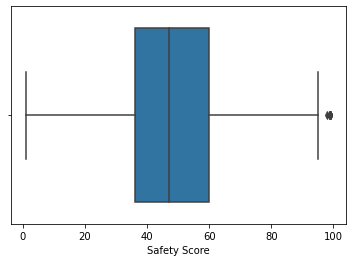

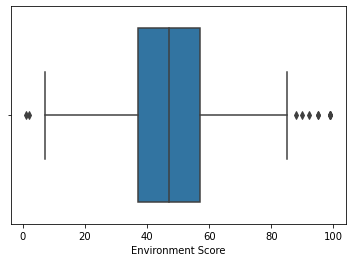

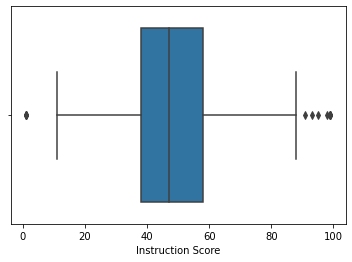

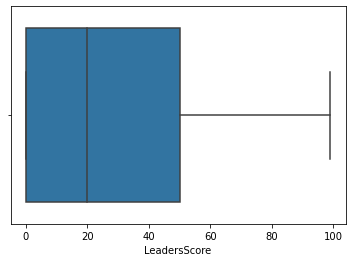

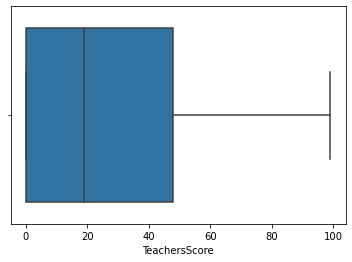

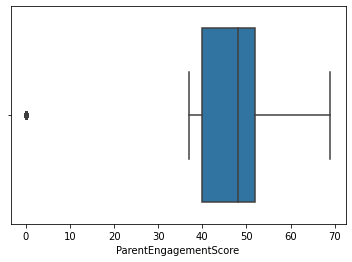

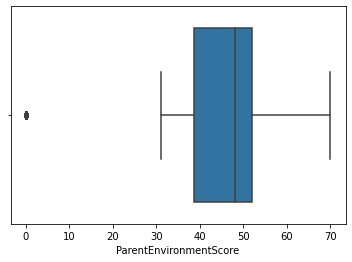

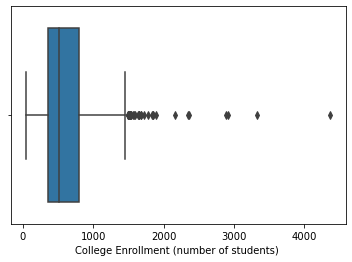

In [11]:
# display districutions for key features
sns.boxplot(x=data['Safety Score'])
plt.show()

sns.boxplot(x=data['Environment Score'])
plt.show()

sns.boxplot(x=data['Instruction Score'])
plt.show()

sns.boxplot(x=data['LeadersScore'])
plt.show()

sns.boxplot(x=data['TeachersScore'])
plt.show()

sns.boxplot(x=data['ParentEngagementScore'])
plt.show()

sns.boxplot(x=data['ParentEnvironmentScore'])
plt.show()

sns.boxplot(x=data['College Enrollment (number of students) '])
plt.show()

## Feature Engineering


In [12]:
# define a list of features for review
features = ['Safety Score',
 'FamilyInvolvementScore',
 'Environment Score',
 'Instruction Score',
 'LeadersScore',
 'TeachersScore',
 'ParentEngagementScore',
 'ParentEnvironmentScore',
 'Average Student Attendance',
 'Rate of Misconducts (per 100 students) ',
 'Average Teacher Attendance',
 'Individualized Education Program Compliance Rate ',
 'College Enrollment (number of students) ', 'Ward', 'Police District']

# establish data for classification
X = data[features]
y = data['AdequateYearlyProgressMade']

X.shape

(548, 15)

In [31]:
#
# NOTE - This cell needs ~20-30 seconds to execute
#

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# utilize Recursive Feature Elimination to reduse the 15 features down to fewer, meaningful ones
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
# fit model
rfecv.fit(X, y)

optimal_number_features = rfecv.n_features_

print('Optimal number of features: {:d}'.format(optimal_number_features))

selected_features = []

# iterate through features and pull the top ranked ones
for i,f in enumerate(features):
    if rfecv.ranking_[i] == 1:
        selected_features.append(f)

# display features identified by the model
print(selected_features)

print(rfecv.score(X, y))

Optimal number of features: 6
['Safety Score', 'ParentEngagementScore', 'ParentEnvironmentScore', 'Average Student Attendance', 'Individualized Education Program Compliance Rate ', 'Police District']
0.9324817518248175


In [21]:
# split data set
from sklearn.model_selection import train_test_split

X_selected = data[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.3, random_state =1, stratify = y)

In [33]:
# execute LogisticRegression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty = 'none', random_state=1)
logreg.fit(X_train, y_train)

print('Score - Training: {:f}'.format(logreg.score(X_train, y_train)))
print('Score - Test: {:f}'.format(logreg.score(X_test, y_test)))

Score - Training: 0.906005
Score - Test: 0.933333


## Results and Discussion

Run the model against representative data culled from the existing dataset using percentiles for both models.

In [37]:
from util import generate_prediction_data

percentiles=[5, 25, 50, 75, 80, 90, 93, 94, 95, 98]

rfecv_prediction_data = generate_prediction_data(features, data, percentiles)

rfecv_predict = rfecv.predict(rfecv_prediction_data)

print('RFECV Results:')

for i, p in enumerate(rfecv_predict):
    if p == 1:
        print('Success at {:d} percentile'.format(percentiles[i]))

logreg_prediction_data = generate_prediction_data(selected_features, data, percentiles)

logreg_predict = logreg.predict(logreg_prediction_data)

print('LogReg Results:')

for i, l in enumerate(logreg_predict):
    if l == 1:
        print('Success at {:d} percentile'.format(percentiles[i]))

RFECV Results:
Success at 94 percentile
Success at 95 percentile
Success at 98 percentile
LogReg Results:
Success at 94 percentile
Success at 95 percentile
Success at 98 percentile


## Conclusion and Summary

### Identify the traits that factor into a superlative school

Based upon the analysis above the dataset of 15 features was reduced to these 6 key features:

- Safety Score
- ParentEngagementScore
- ParentEnvironmentScore
- Average Student Attendance
- Individualized Education Program Compliance Rate
- Police District

Taken together, these features represent a fairly clear picture of the ingredients for educational success.  They're a blend physical safety, parental support and participation.

### Determine if geographic factors have any impact on school performance

Inconclusive.  There were two geographic features included in the dataset: Ward and Police District.  The RFECV model deemed Police District to be significant, but that grouping alone likely lacks adequate context.  Perhaps an economic indicator would be a more meaningful dimension.

### Create a model that scores 85% or better

The RFECV model scored 0.9324817518248175 or 93%.  The Logistic Regression model scored a similar 93%.

## Limitations and Future Work

There did not appear to be an adjacent dataset ie, the preceeding or subsequent year, which would have been useful for testing the prediction model.

Economic indicators are not present, so incorporating those factors could help to better understand the circumstances surrounding schools and the population they serve.  Leveraging income data for the school's ward or police district would be informative.  Additionally, spending per school derived from the Chicago Public Schools' operating budget could help inform what resources are being allocated per school.

Lastly, geography plays a lot into the economic opportunities for citizens of Chicago.  Lake Michigan serves as a physical boundary to the east, with populations to the north and east perceived as generally more affluent.  The basic map below illustrates this.

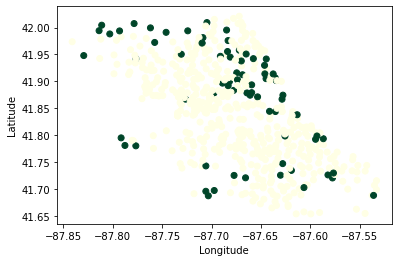

In [20]:
# plot schools on a map
# passibng schools are darker color
plt.scatter(y=data['Latitude'], x=data['Longitude'], c=data['AdequateYearlyProgressMade'], cmap='YlGn')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

## References and Contributions

Made liberal use of the documentation sites for pandas, sklearn, matplotlib and seaborn

[Building A Logistic Regression in Python, Step by Step](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8) - Susan Li

[Feature Selection For Machine Learning in Python](https://machinelearningmastery.com/rfe-feature-selection-in-python/) - Jason Brownlee